In [2]:
from google.colab import files

uploaded = files.upload()


Saving Mall_Customers.csv to Mall_Customers.csv


In [3]:
import pandas as pd

# Load the uploaded dataset
df = pd.read_csv("Mall_Customers.csv")

# Check basic information
print(df.shape)      # rows and columns
print(df.columns)    # column names

# Preview the data
df.head()


(200, 5)
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Select relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Verify selected data
X.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [5]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Scale the selected features
X_scaled = scaler.fit_transform(X)

# Check scaled values
X_scaled[:5]


array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

In [6]:
from sklearn.cluster import KMeans

# Create K-Means model
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model and predict clusters
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = clusters

# Verify
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


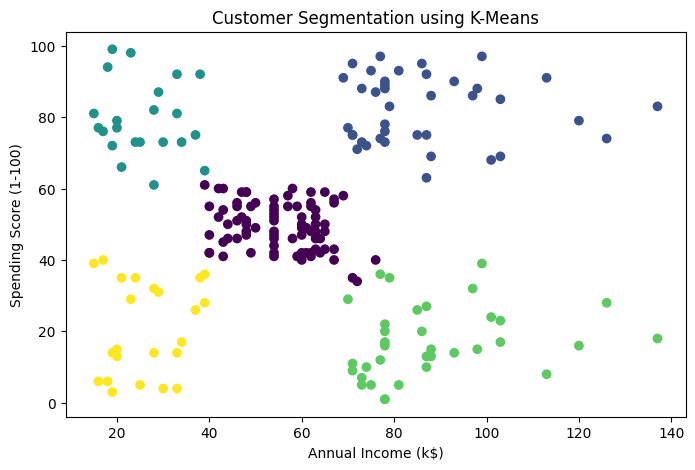

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(
    X.iloc[:, 0],
    X.iloc[:, 1],
    c=df['Cluster']
)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation using K-Means")
plt.show()


In [9]:
# Correct cluster analysis code
cluster_summary = df.groupby('Cluster')[[
    'Age',
    'Annual Income (k$)',
    'Spending Score (1-100)'
]].mean()

cluster_summary


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


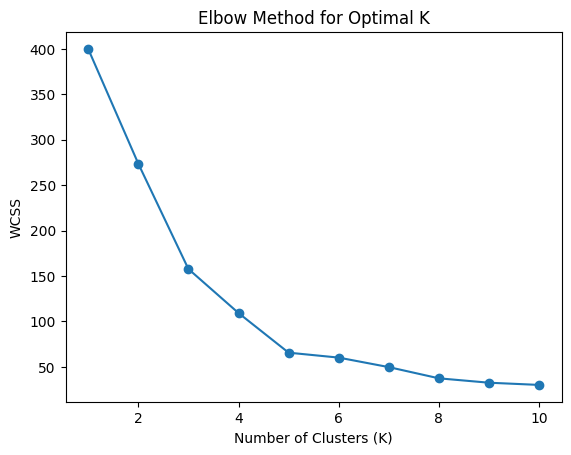

In [10]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

import matplotlib.pyplot as plt

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()


In [11]:
df.to_csv("Mall_Customers_Clustered.csv", index=False)


In [12]:
from google.colab import files
files.download("Mall_Customers_Clustered.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>